Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.


In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]
def value(theta, **kwargs):
    _ = kwargs
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(theta) * prior.pdf(theta)
def proposal(current, sigma, **kwargs):
    _ = kwargs
    likelihood = lambda thetas: stats.binom(N, thetas).pmf(k)
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)
post = metroplis(0.2, value, proposal, 3000, sigma=0.1)
fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, bins=50, density=True, label='MCMC posterior')
plt.plot(thetas, stats.beta(k+a, N-k+b).pdf(np.linspace(0, 1, 200)),
         label='True posterior', c='red')
plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

NameError: name 'likelihood' is not defined

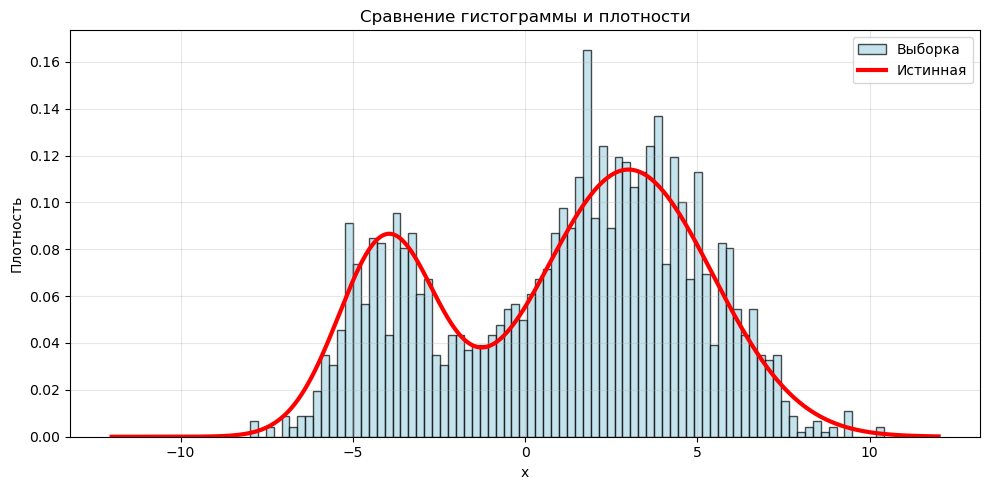

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def d(x):
    return 0.3 * norm(-4, np.sqrt(2)).pdf(x) + 0.7 * norm(3, np.sqrt(6)).pdf(x)

def metropolis(n_samples, start=0, step=4.0):
    sam = np.zeros(n_samples)
    sam[0] = start
    for i in range(1, n_samples):
        curr = sam[i-1]
        prop = np.random.normal(curr, step)
        ratio = d(prop) /d(curr)
        if np.random.uniform(0, 1) < min(1, ratio):
            sam[i] = prop
        else:
            sam[i] = curr
    return sam

n_samples = 2000
sam = metropolis(n_samples, start=0, step=4.0)

x = np.linspace(-12, 12, 1000)
true = d(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.hist(sam, bins=80, density=True, alpha=0.7, 
         color='lightblue', edgecolor='black', label='Выборка')
plt.plot(x, true, 'r-', linewidth=3, label='Истинная')
plt.title('Сравнение гистограммы и плотности')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

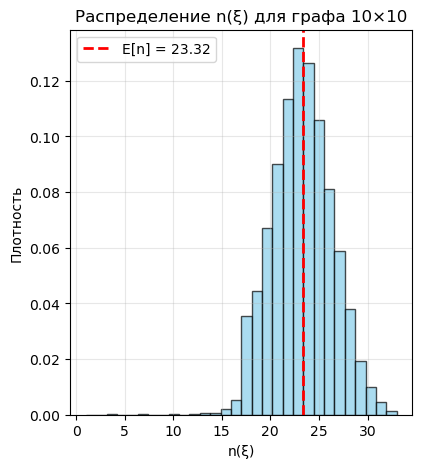

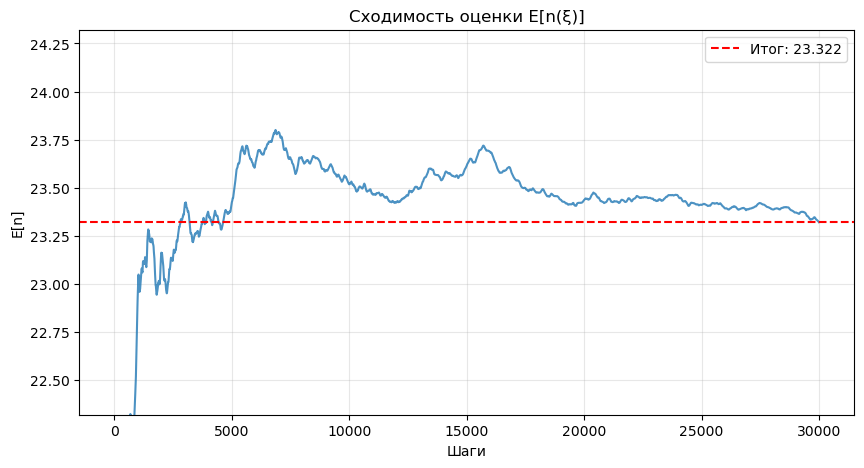

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def flip(config, v, n):
    if config[v] == 1:
        return True
    
    if(v + 1 < n ** 2):
        if(config[v + 1] == 1):
            return False
    if(v + n < n ** 2):
        if(config[v + n] == 1):
            return False
    if(v - 1 > 0):
        if(config[v - 1] == 1):
            return False
    if(v - n > 0):
        if(config[v - n] == 1):
            return False
    return True
    
def mcmc(n, num):
    config = np.zeros(n ** 2, dtype=int)
    counts = []
    for step in range(num):
        v = np.random.randint(0, n ** 2)
        if flip(config, v, n):
            config[v] = 1 - config[v]
        counts.append(np.sum(config))
    return counts


c = mcmc(10, num=30000)
avg = np.mean(c)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(c, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.axvline(avg, color='red', linestyle='--', linewidth=2, 
            label=f'E[n] = {avg:.2f}')
plt.xlabel('n(ξ)')
plt.ylabel('Плотность')
plt.title('Распределение n(ξ) для графа 10×10')
plt.legend()
plt.grid(True, alpha=0.3)

m = np.cumsum(c) / np.arange(1, len(c) + 1)

plt.figure(figsize=(10, 5))
plt.plot(m, alpha=0.8)
plt.axhline(avg, color='red', linestyle='--', 
           label=f'Итог: {avg:.3f}')
plt.xlabel('Шаги')
plt.ylabel('E[n]')
plt.title('Сходимость оценки E[n(ξ)]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(avg - 1, avg + 1)
plt.show()